In [29]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:

df = pd.read_excel(
    "./src/assets/output/results/resultado_RCE_1.xlsx"
)
df

,Resultado,best fitness value,media,desvio,var_decision,solution_gen
0,1,2.263996,180.390048,38.348344,"[-0.996, 0.016, 0.003, 0.001, -0.003, 0.007, 0...",366


In [73]:

def stringArrayToList():

    valores = df["var_decision"].values
    array = []
    array_near_zero = []

    # Iterate through each value (assuming each value is a string representation of a list)
    for value_str in valores:
        try:
            # Remove leading and trailing brackets (if present)
            value_str = value_str.strip("[]")

            # Convert string to a list of floats
            value_list = [float(item) for item in value_str.split(",")]

            # Add the converted list to the array
            array.extend(value_list)  # Use extend for appending multiple values
        except ValueError:
            # Handle conversion errors (optional)
            print(f"Warning: Failed to convert '{value_str}' to float list. Skipping.")

    # Print the resulting array of numerical values
    print(array)



    for value in array:
        if abs(value) <= 0.06:
            array_near_zero.append(value)
    
    return array_near_zero


,Resultado,best fitness value,media,desvio,var_decision,solution_gen
0,1,2.263996,180.390048,38.348344,"[-0.996, 0.016, 0.003, 0.001, -0.003, 0.007, 0...",366
1,2,0.808704,184.278329,35.999757,"[-0.04, -0.024, -0.031, -0.005, 0.004, -0.002,...",390
2,3,1.536428,184.194413,35.055237,"[-0.016, -0.037, -0.015, 0.002, -0.016, 0.01, ...",381
3,4,0.841886,184.849320,35.645073,"[-0.017, -0.0, 0.032, -0.011, -0.003, 0.025, 0...",372
4,5,0.887211,180.743168,36.634907,"[0.018, -0.009, -0.02, 0.003, -0.035, -0.034, ...",333
5,6,1.590082,184.162823,36.415994,"[0.018, -0.054, 0.016, 0.044, 0.005, -0.04, -0...",291
6,7,0.608710,183.488548,36.030022,"[0.032, -0.003, -0.003, -0.004, -0.003, 0.022,...",372
7,8,0.674941,183.414062,36.751619,"[0.001, -0.021, 0.003, 0.008, -0.003, -0.02, 0...",375
8,9,1.122987,185.965247,41.391293,"[0.029, -0.012, -0.043, 0.002, 0.021, -0.038, ...",368
9,10,0.648905,183.993564,39.673067,"[-0.006, 0.026, 0.023, 0.009, 0.016, 0.009, 0....",356


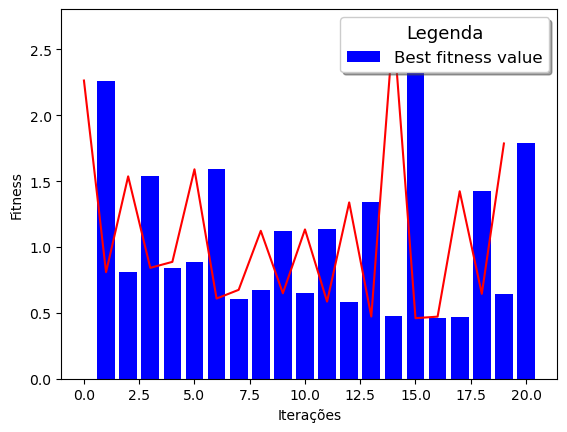

In [31]:


def ler_e_concatenar_excel(caminho_arquivos):
    df_final = pd.DataFrame()

    for arquivo in caminho_arquivos:
        df_temp = pd.read_excel(arquivo)
        # Ajustar o index para evitar duplicatas
        df_temp.index += len(df_final)
        df_final = pd.concat([df_final, df_temp], ignore_index=True)

    return df_final


caminho_arquivos = "./src/assets/output/results/"
numero_arquivos = 20  # Ajuste o número de arquivos

# Criar lista de caminhos de arquivo
lista_arquivos = []
for i in range(1, numero_arquivos + 1):
    nome_arquivo = f"resultado_RCE_{i}.xlsx"
    caminho_arquivo = os.path.join(caminho_arquivos, nome_arquivo)
    lista_arquivos.append(caminho_arquivo)

# Ler e concatenar os arquivos
df_consolidado = ler_e_concatenar_excel(lista_arquivos)

# Exibir o DataFrame consolidado
display(df_consolidado)
df_consolidado.to_excel(
    "./src/assets/output/resultado consolidado/resultado_consolidado.xlsx",
    index=False,
)

plt.plot(df_consolidado["best fitness value"], color = "red")

plt.xlabel("Iterações")
plt.ylabel("Fitness")


plt.bar(
    df_consolidado["Resultado"],
    df_consolidado["best fitness value"],
    color="blue",
    label="Best fitness value",
)
plt.legend(
    title="Legenda",
    title_fontsize="13",
    loc="upper right",
    fontsize="12",
    shadow=True,
    facecolor="white",
)

plt.show()

[-0.996, 0.016, 0.003, 0.001, -0.003, 0.007, 0.043, -0.026, 0.057, -0.018]


/tmp/ipykernel_1731761/637696642.py:7: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


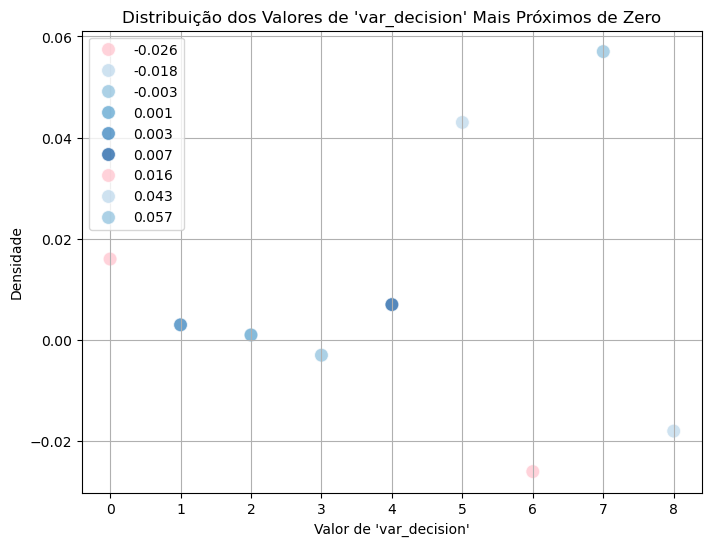

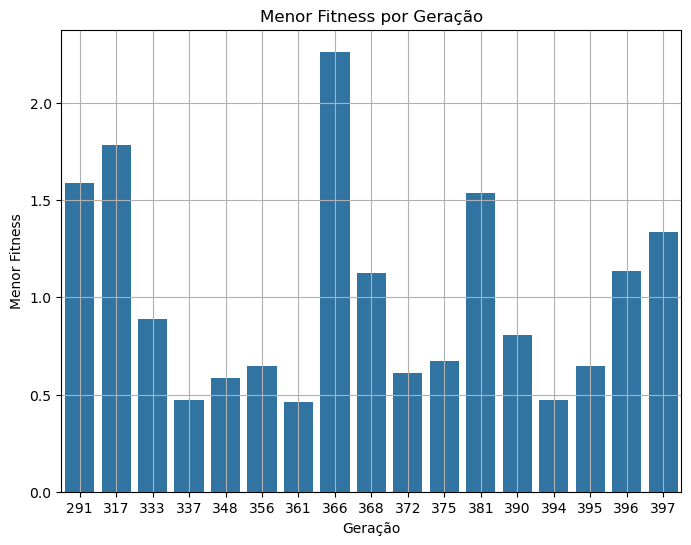

In [95]:
var_decision_near_zero = stringArrayToList()

plt.figure(figsize=(8, 6))
cmap = sns.color_palette("Blues",)  # Create a red color palette with 2 colors
cmap[0] = "pink"  # Assign red to the first color (value 0)
# Generate the scatterplot with hue and custom color map
sns.scatterplot(
    x=range(len(var_decision_near_zero)),
    y=var_decision_near_zero,
    hue=var_decision_near_zero,
    palette=cmap,
    s=100,  # Adjust marker size as needed
    alpha=0.7,  # Adjust marker transparency as needed
)
plt.title("Distribuição dos Valores de 'var_decision' Mais Próximos de Zero")
plt.xlabel("Valor de 'var_decision'")
plt.ylabel("Densidade")
plt.grid(True)
plt.show()

# 3. Bar plot of lowest fitness values by generation
lowest_fitness_by_gen = df_consolidado.groupby("solution_gen")[
    "best fitness value"
].min()
plt.figure(figsize=(8, 6))
sns.barplot(x=lowest_fitness_by_gen.index, y=lowest_fitness_by_gen.values)
plt.title("Menor Fitness por Geração")
plt.xlabel("Geração")
plt.ylabel("Menor Fitness")
plt.grid(True)
plt.show()

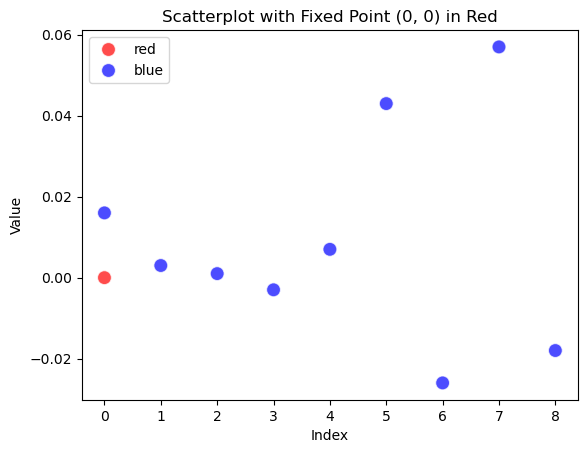

In [97]:
import pandas as pd
import seaborn as sns  # Import Seaborn for scatterplot
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the filtered values are stored in 'var_decision_near_zero'

# Prepare data for scatterplot
x_data = list(range(len(var_decision_near_zero)))
y_data = var_decision_near_zero

# Create a separate data point for (0, 0) in red
red_point_x = [0]  # X-coordinate for (0, 0)
red_point_y = [0]  # Y-coordinate for (0, 0)
red_point_color = ["red"]  # Color for (0, 0)

# Combine data for the plot
x_data_combined = red_point_x + x_data  # Combine X-coordinates
y_data_combined = red_point_y + y_data  # Combine Y-coordinates
color_data_combined = red_point_color + ["blue"] * len(
    var_decision_near_zero
)  # Combine colors

# Generate the scatterplot with hue and custom color map
sns.scatterplot(
    x=x_data_combined,
    y=y_data_combined,
    hue=color_data_combined,
    palette=["red", "blue"],  # Use a simple 'red' and 'blue' palette
    s=100,  # Adjust marker size as needed
    alpha=0.7,  # Adjust marker transparency as needed
)

# Set axis labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Scatterplot with Fixed Point (0, 0) in Red")

# Show the plot
plt.show()